## Objective:

The primary objective of this project is to develop a predictive model that can accurately estimate the total fare of a taxi trip given various input features such as pickup and drop-off locations, trip distance, time of day, and trafﬁc conditions. The challenges in this problem include dealing with large
datasets, extracting meaningful features etc.

In [ ]:
!pip install dask[complete] s3fs

  Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 require

In [ ]:
!pip install "fsspec==2023.6.0"  # Reverting to a version compatible with gcsfs

  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.3.1
    Uninstalling fsspec-2024.3.1:
      Successfully uninstalled fsspec-2024.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 require

In [ ]:
import os

# Set AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = <access_key>
os.environ['AWS_SECRET_ACCESS_KEY'] = <secret_key>
os.environ['AWS_REGION'] = 'us-east-1'

In [ ]:
import dask.dataframe as dd
from dask.distributed import Client

client = Client()  # Starts a local Dask client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-zyesc4nx', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38129
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43709'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34085'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43599'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34247'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39771', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39771
INFO:distributed.core:Starting established connection to

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [ ]:
train_path = 's3://clean-taxi-data/taxi_trained_data.csv'

## Distributed Processing with Dask

In [ ]:
train = dd.read_csv(train_path, storage_options={'key': os.environ['AWS_ACCESS_KEY_ID'], 'secret': os.environ['AWS_SECRET_ACCESS_KEY']})

## Understanding the data :

In [ ]:
train.head() #checking first five rows of the training dataset

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data


shape of training data is:  (Delayed('int-06fa2868-f1da-403e-971e-e01664bc2077'), 8)


In [ ]:
train.dtypes #checking the data-types in training dataset

key                  string[pyarrow]
fare_amount                  float64
pickup_datetime      string[pyarrow]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
dtype: object

Here we can see pickup datetime is of string and fare amount is of float type. So we need to change the data type of both.

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
npartitions=1,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...


## Data Cleaning & Missing Value Analysis (Data Mining) :

In [ ]:

train_pd = train.compute()  # Convert to Pandas DataFrame for detailed manipulation

# Now convert 'fare_amount' to numeric, coercing errors to NaN
train_pd['fare_amount'] = pd.to_numeric(train_pd['fare_amount'], errors='coerce')

In [ ]:
train_pd.dtypes

key                  string[pyarrow]
fare_amount                  float64
pickup_datetime      string[pyarrow]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
dtype: object

In [ ]:
train_pd.shape

(55423856, 8)

In [ ]:
train_pd.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
622599,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
622600,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
622601,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
622602,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [ ]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train_pd['pickup_datetime'] =  pd.to_datetime(train_pd['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 203.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 203.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause tim

In [ ]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train_pd['year'] = train_pd['pickup_datetime'].dt.year
train_pd['Month'] = train_pd['pickup_datetime'].dt.month
train_pd['Date'] = train_pd['pickup_datetime'].dt.day
train_pd['Day'] = train_pd['pickup_datetime'].dt.dayofweek
train_pd['Hour'] = train_pd['pickup_datetime'].dt.hour
train_pd['Minute'] = train_pd['pickup_datetime'].dt.minute

In [ ]:
train_pd.dtypes #Re-checking datatypes after conversion

key                  string[pyarrow]
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
year                           int32
Month                          int32
Date                           int32
Day                            int32
Hour                           int32
Minute                         int32
dtype: object

#### Observations :

1. Passenger count should not exceed 6(even if we consider SUV)
2. Latitudes range from -90 to 90. Longitudes range from -180 to 180
3. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

Checking the Datetime Variable :

In [ ]:
#removing datetime missing values rows
train_pd = train_pd.drop(train_pd[train_pd['pickup_datetime'].isnull()].index, axis=0)
print(train_pd.shape)
print(train_pd['pickup_datetime'].isnull().sum())

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


(55423856, 14)
0


Checking the passenger count variable :

In [ ]:
train_pd["passenger_count"].describe()

count    5.542386e+07
mean     1.685380e+00
std      1.327664e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

We can see maximum number of passanger count is 208 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [ ]:
train_pd = train_pd.drop(train_pd[train_pd["passenger_count"]> 6 ].index, axis=0)

INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 15.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 15.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeo

In [ ]:
#Also removing the values with passenger count of 0.
train_pd = train_pd.drop(train_pd[train_pd["passenger_count"] == 0 ].index, axis=0)

INFO:distributed.core:Event loop was unresponsive in Nanny for 14.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 19.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 30.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 30.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 30.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

In [ ]:
train_pd["passenger_count"].describe()

count    4.045863e+07
mean     1.691031e+00
std      1.307129e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [ ]:
train_pd["passenger_count"].sort_values(ascending= True)

36        1
39        1
42        1
43        1
44        1
         ..
350422    6
459942    6
50210     6
245876    6
411149    6
Name: passenger_count, Length: 40458630, dtype: int64

In [ ]:
#removing passanger_count missing values rows
train_pd = train_pd.drop(train_pd[train_pd['passenger_count'].isnull()].index, axis=0)
print(train_pd.shape)
print(train_pd['passenger_count'].isnull().sum())

(40458630, 14)
0


There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value

In [ ]:
train_pd = train_pd.drop(train_pd[train_pd["passenger_count"] == 0.12 ].index, axis=0)
train_pd.shape

(40458630, 14)

Next checking the Fare Amount variable :

In [ ]:
##finding decending order of fare to get to know whether the outliers are present or not
train_pd["fare_amount"].sort_values(ascending=False)

554586    93963.36
85587     75747.02
177632    61550.86
142279     9000.41
285247     3130.30
            ...   
207342     -105.00
156532     -107.75
148809     -145.00
399859     -176.00
496120     -300.00
Name: fare_amount, Length: 40458630, dtype: float64

In [ ]:
Counter(train_pd["fare_amount"]<0)

INFO:distributed.core:Event loop was unresponsive in Nanny for 7.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Counter({False: 40456870, True: 1760})

INFO:distributed.core:Event loop was unresponsive in Nanny for 7.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 7.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
train_pd = train_pd.drop(train_pd[train_pd["fare_amount"]<0].index, axis=0)
train_pd.shape

INFO:distributed.core:Event loop was unresponsive in Nanny for 7.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 10.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeou

(40302383, 14)

In [ ]:
##make sure there is no negative values in the fare_amount variable column
train_pd["fare_amount"].min()

0.0

In [ ]:
#Also remove the row where fare amount is zero
train_pd = train_pd.drop(train_pd[train_pd["fare_amount"]<1].index, axis=0)
train_pd.shape

INFO:distributed.core:Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 6.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 8.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 14.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeou

(40171642, 14)

In [ ]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train_pd = train_pd.drop(train_pd[train_pd["fare_amount"]> 454 ].index, axis=0)
train_pd.shape

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

(40165056, 14)

In [ ]:
# eliminating rows for which value of "fare_amount" is missing
train_pd = train_pd.drop(train_pd[train_pd['fare_amount'].isnull()].index, axis=0)
print(train_pd.shape)
print(train_pd['fare_amount'].isnull().sum())

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


(40165056, 14)
0


In [ ]:
train_pd["fare_amount"].describe()

count    4.016506e+07
mean     1.134850e+01
std      9.772045e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      4.500000e+02
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [ ]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train_pd[train_pd['pickup_latitude']<-90]
train_pd[train_pd['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,5,11,15
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00,2140.601160,1703.092772,-1251.195890,-1189.615440,1,2011,11,21,0,21,36
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00,-74.002497,405.350000,-73.978600,40.739962,1,2011,4,23,5,2,55
65975,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00,2522.271325,2621.628430,-1718.117653,-2864.471003,1,2012,3,22,3,21,40
347558,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00,-73.957087,424.083332,-73.968312,40.765117,1,2012,4,12,3,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156980,2011-07-16 13:21:00.00000019,8.9,2011-07-16 13:21:00,-73.986165,405.133332,-73.993818,40.761572,3,2011,7,16,5,13,21
254522,2012-04-26 23:18:00.00000095,23.7,2012-04-26 23:18:00,-73.977275,404.700000,-73.989475,40.684077,1,2012,4,26,3,23,18
385666,2011-08-10 10:05:00.00000018,7.7,2011-08-10 10:05:00,-1267.942923,2165.889693,-2593.367637,1598.247970,1,2011,8,10,2,10,5
581995,2011-11-10 23:25:00.000000223,2.5,2011-11-10 23:25:00,-2959.462187,2371.279908,770.672687,-774.447875,1,2011,11,10,3,23,25


In [ ]:
#Hence dropping one value of >90
train_pd = train_pd.drop((train_pd[train_pd['pickup_latitude']<-90]).index, axis=0)
train_pd = train_pd.drop((train_pd[train_pd['pickup_latitude']>90]).index, axis=0)


INFO:distributed.core:Event loop was unresponsive in Nanny for 11.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 11.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 11.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 11.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 11.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

In [ ]:
train_pd[train_pd['pickup_longitude']<-180]
train_pd[train_pd['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
136122,2011-09-02 14:38:00.00000011,23.7,2011-09-02 14:38:00,2228.738685,40.760237,-73.959787,40.713892,2,2011,9,2,4,14,38
568950,2011-06-04 12:32:00.00000034,42.5,2011-06-04 12:32:00,833.386565,-2.595688,1707.203463,2980.782555,1,2011,6,4,5,12,32
538350,2011-09-07 20:06:00.000000177,6.1,2011-09-07 20:06:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,20,6
297518,2011-09-07 22:42:00.000000125,17.3,2011-09-07 22:42:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,22,42
305067,2011-07-01 08:53:00.000000127,5.7,2011-07-01 08:53:00,1662.459703,-44.548278,402.768385,-402.454305,1,2011,7,1,4,8,53
378318,2011-11-12 12:24:00.000000181,6.5,2011-11-12 12:24:00,2130.827885,-73.898090,2130.827885,-73.898090,1,2011,11,12,5,12,24
372764,2012-10-27 14:19:00.00000070,8.0,2012-10-27 14:19:00,1328.722747,40.737990,-73.979347,40.761982,2,2012,10,27,5,14,19
111812,2011-09-04 19:23:00.00000065,5.3,2011-09-04 19:23:00,2157.301527,-50.152285,2157.301527,-50.152285,1,2011,9,4,6,19,23
343647,2009-09-23 10:41:00.00000060,6.5,2009-09-23 10:41:00,508.979215,10.184667,508.979215,10.184667,3,2009,9,23,2,10,41
93216,2011-09-04 11:29:00.00000019,14.1,2011-09-04 11:29:00,2157.301527,-50.152285,2157.301527,-50.152285,1,2011,9,4,6,11,29


In [ ]:
train_pd[train_pd['dropoff_latitude']<-90]
train_pd[train_pd['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00,-74.008918,40.717827,-74.000855,404.133332,1,2012,1,3,1,9,4
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59,-73.977635,40.754687,-73.870432,405.650000,1,2010,8,14,5,3,42
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00,-73.870875,40.773792,-73.977790,404.716667,1,2012,5,2,2,14,20
125754,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00,-74.015200,40.709665,-40.719295,1651.553433,5,2013,1,2,2,11,33
418805,2012-06-11 14:36:00.0000009,14.9,2012-06-11 14:36:00,-73.949868,40.822197,0.000000,1903.111567,1,2012,6,11,0,14,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604478,2011-11-17 16:52:00.000000108,4.5,2011-11-17 16:52:00,-1.100000,0.000000,0.000000,400.191755,1,2011,11,17,3,16,52
610966,2011-12-30 14:09:00.000000191,49.8,2011-12-30 14:09:00,-74.003797,40.722282,-73.792223,409.233332,3,2011,12,30,4,14,9
120843,2012-07-15 13:35:00.00000045,7.7,2012-07-15 13:35:00,-73.979492,40.784487,-73.966160,413.583332,3,2012,7,15,6,13,35
455365,2012-06-15 20:20:00.00000088,4.5,2012-06-15 20:20:00,-74.005990,40.712027,-0.198333,474.007988,1,2012,6,15,4,20,20


In [ ]:
train_pd[train_pd['dropoff_longitude']<-180]
train_pd[train_pd['dropoff_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
435728,2011-08-25 16:03:00.000000122,8.5,2011-08-25 16:03:00,-73.969230,40.762733,1328.726180,40.751985,6,2011,8,25,3,16,3
568950,2011-06-04 12:32:00.00000034,42.5,2011-06-04 12:32:00,833.386565,-2.595688,1707.203463,2980.782555,1,2011,6,4,5,12,32
538350,2011-09-07 20:06:00.000000177,6.1,2011-09-07 20:06:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,20,6
59652,2010-10-17 16:39:00.000000154,5.7,2010-10-17 16:39:00,-73.971760,40.799622,3133.218913,-2526.988633,1,2010,10,17,6,16,39
407457,2012-04-16 08:18:00.000000172,7.7,2012-04-16 08:18:00,-73.985230,40.734918,2051.037653,0.000000,1,2012,4,16,0,8,18
297518,2011-09-07 22:42:00.000000125,17.3,2011-09-07 22:42:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,22,42
305067,2011-07-01 08:53:00.000000127,5.7,2011-07-01 08:53:00,1662.459703,-44.548278,402.768385,-402.454305,1,2011,7,1,4,8,53
378318,2011-11-12 12:24:00.000000181,6.5,2011-11-12 12:24:00,2130.827885,-73.898090,2130.827885,-73.898090,1,2011,11,12,5,12,24
502604,2013-02-03 09:48:00.00000041,6.5,2013-02-03 09:48:00,-73.975550,40.674353,1428.740223,40.686698,1,2013,2,3,6,9,48
111812,2011-09-04 19:23:00.00000065,5.3,2011-09-04 19:23:00,2157.301527,-50.152285,2157.301527,-50.152285,1,2011,9,4,6,19,23


In [ ]:
train_pd.shape

(40098818, 14)

In [ ]:
train_pd.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Now we have successfully cleaned our training dataset. Thus proceeding for further operations:

## Now we use Haversine formula as a Data Mining Technique to calculate the distance between the coordinates.

Calculating distance based on the given coordinates :


In [ ]:
#As we know that we have given pickup longitute and latitude values and same for drop.
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [ ]:
train_pd['distance'] = train_pd[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

INFO:distributed.core:Event loop was unresponsive in Nanny for 5.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

In [ ]:
train_pd.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [ ]:
train_pd.nunique()

key                  40098818
fare_amount              8623
pickup_datetime      20137002
pickup_longitude       317071
pickup_latitude        325257
dropoff_longitude      408380
dropoff_latitude       422915
passenger_count             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance             38933708
dtype: int64

In [ ]:
##finding decending order of fare to get to know whether the outliers are presented or not
train_pd['distance'].sort_values(ascending=False)

372621    19688.800562
21314     17873.415000
419811    17558.572888
230621    16986.879633
449251    16889.660889
              ...     
472291        0.000000
281967        0.000000
459511        0.000000
79877         0.000000
311342        0.000000
Name: distance, Length: 40098818, dtype: float64

The sorted list of distances from highest to lowest reveals potential outliers in the dataset. The top values, such as 19,688.8 km, far exceed plausible taxi ride distances within a typical city or even across most countries. This suggests errors or anomalies in the data. For instance, a distance value of 19,688.8 km could result from incorrect latitude and longitude coordinates or data entry errors.



In [ ]:
Counter(train_pd['distance'] == 0)

INFO:distributed.core:Event loop was unresponsive in Nanny for 7.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Counter({False: 38953604, True: 1145214})

INFO:distributed.core:Event loop was unresponsive in Scheduler for 7.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
Counter(train_pd['fare_amount'] == 0)

INFO:distributed.core:Event loop was unresponsive in Nanny for 7.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


Counter({False: 40098818})

INFO:distributed.core:Event loop was unresponsive in Scheduler for 7.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
train_pd = train_pd[train_pd['distance'] != 0]


In [ ]:
train_pd.shape

(38953604, 15)

In [ ]:
#we will remove the rows whose distance values is very high which is more than 129kms
train_pd = train_pd.drop(train_pd[train_pd['distance'] > 130 ].index, axis=0)
train_pd.shape

INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

(32405463, 15)

In [ ]:
train_pd.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,9,50,3.787239


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [ ]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train_pd = train_pd.drop(drop, axis = 1)

In [ ]:
train_pd.head()

,key,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,2009-06-15 17:26:21.0000001,4.5,1,2009,6,15,0,17,1.030764
2,2011-08-18 00:35:00.00000049,5.7,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.7,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,1,2010,3,9,1,7,1.999157
5,2011-01-06 09:50:45.0000002,12.1,1,2011,1,6,3,9,3.787239


In [ ]:
train_pd['passenger_count'] = train_pd['passenger_count'].astype('int64')
train_pd['year'] = train_pd['year'].astype('int64')
train_pd['Month'] = train_pd['Month'].astype('int64')
train_pd['Date'] = train_pd['Date'].astype('int64')
train_pd['Day'] = train_pd['Day'].astype('int64')
train_pd['Hour'] = train_pd['Hour'].astype('int64')

In [ ]:
train_pd.dtypes

key                string[pyarrow]
fare_amount                float64
passenger_count              int64
year                         int64
Month                        int64
Date                         int64
Day                          int64
Hour                         int64
distance                   float64
dtype: object

# Data Visualization :

Visualization of following:

1. Number of Passengers effects the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

INFO:distributed.core:Event loop was unresponsive in Nanny for 17.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 17.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 18.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 18.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 18.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

<Axes: xlabel='passenger_count', ylabel='count'>

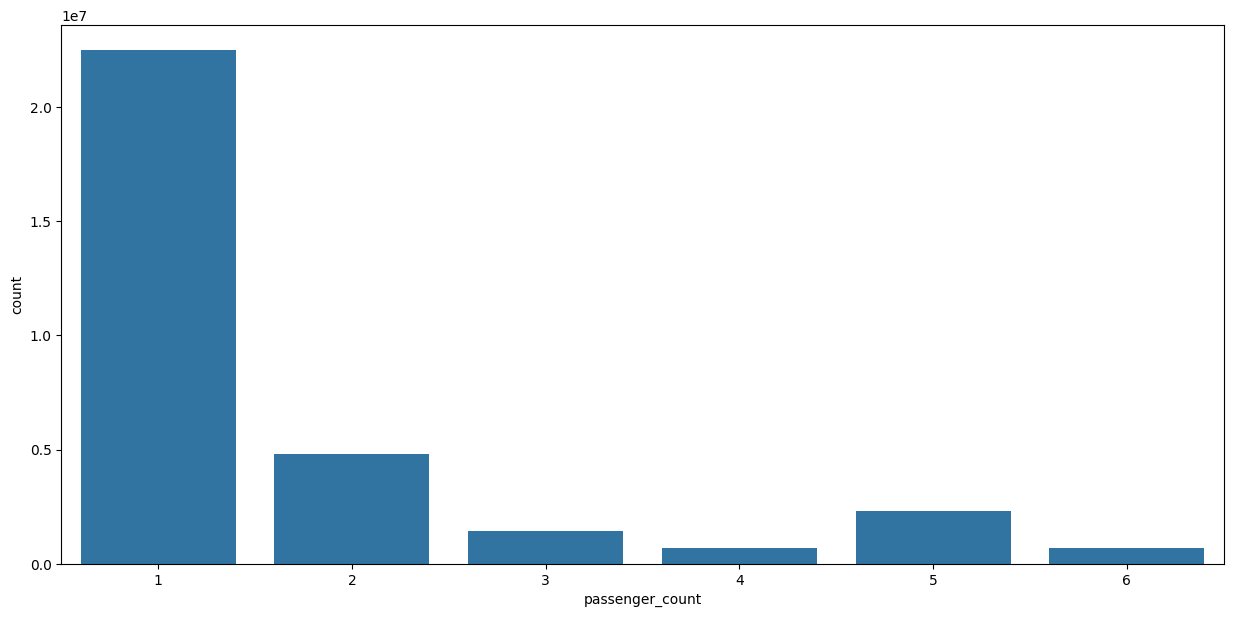

In [ ]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train_pd)

INFO:distributed.core:Event loop was unresponsive in Nanny for 43.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 43.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

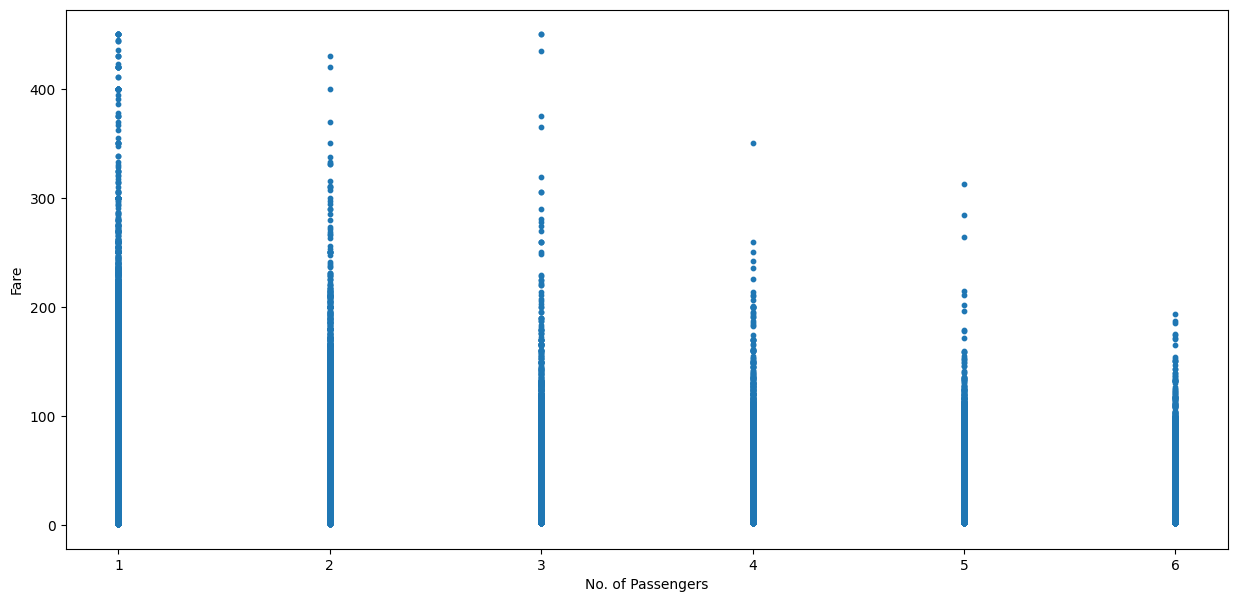

In [ ]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train_pd['passenger_count'], y=train_pd['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Observations :
   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

INFO:distributed.core:Event loop was unresponsive in Scheduler for 43.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 43.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

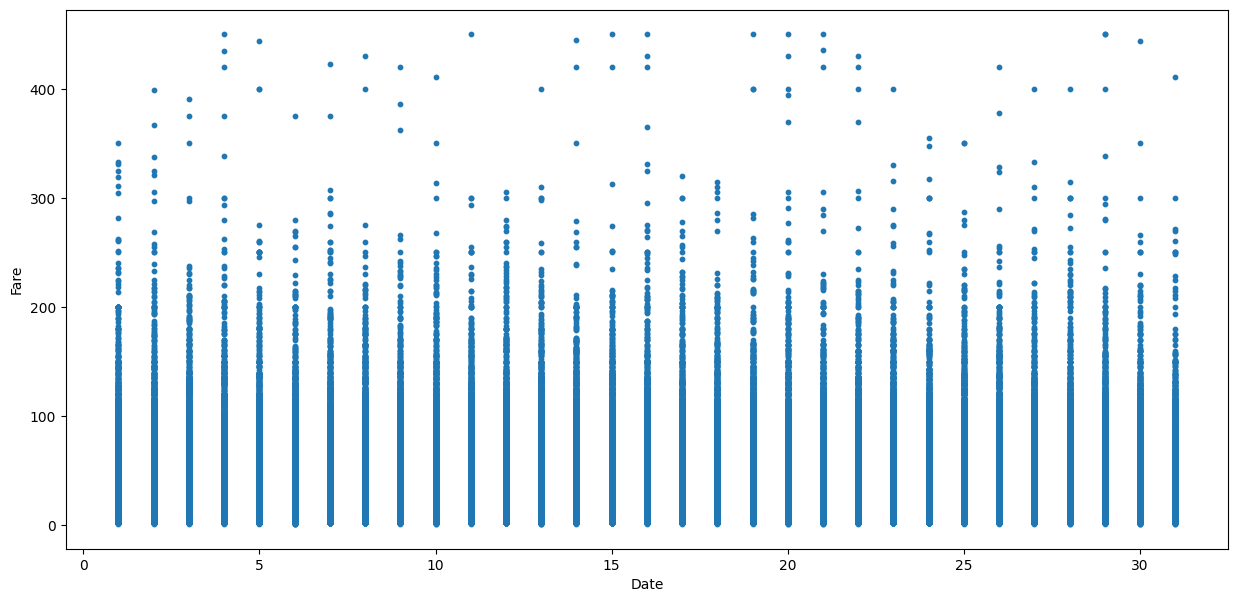

In [ ]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_pd['Date'], y=train_pd['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

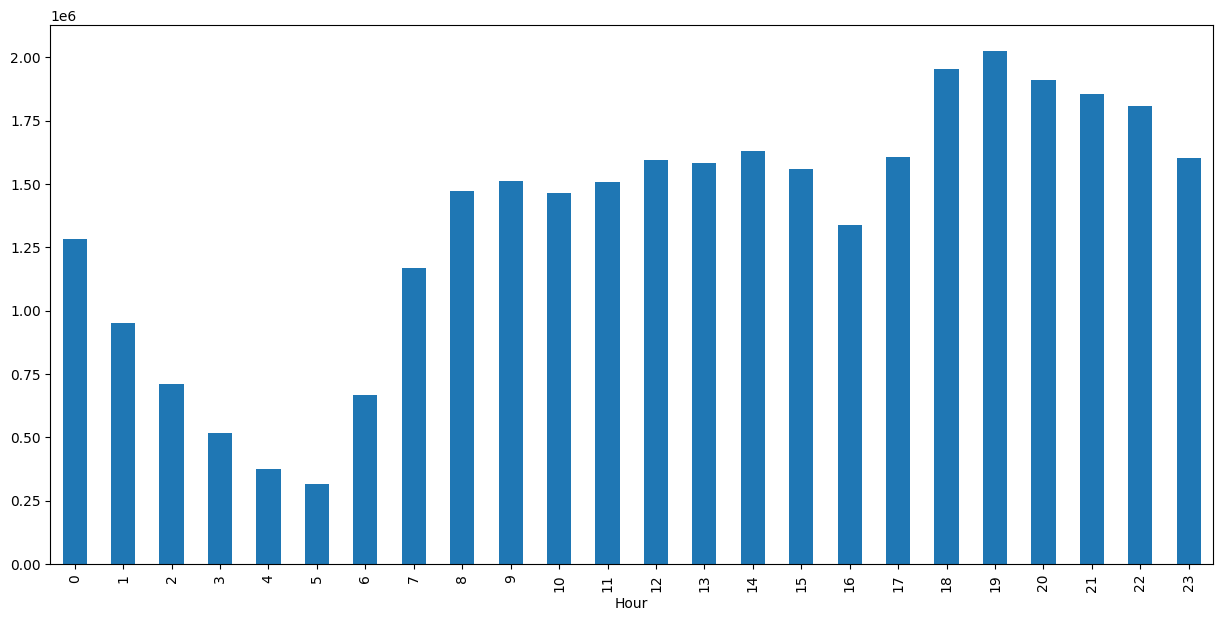

In [ ]:
plt.figure(figsize=(15,7))
train_pd.groupby(train_pd["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

INFO:distributed.core:Event loop was unresponsive in Nanny for 44.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 44.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 44.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 44.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 44.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

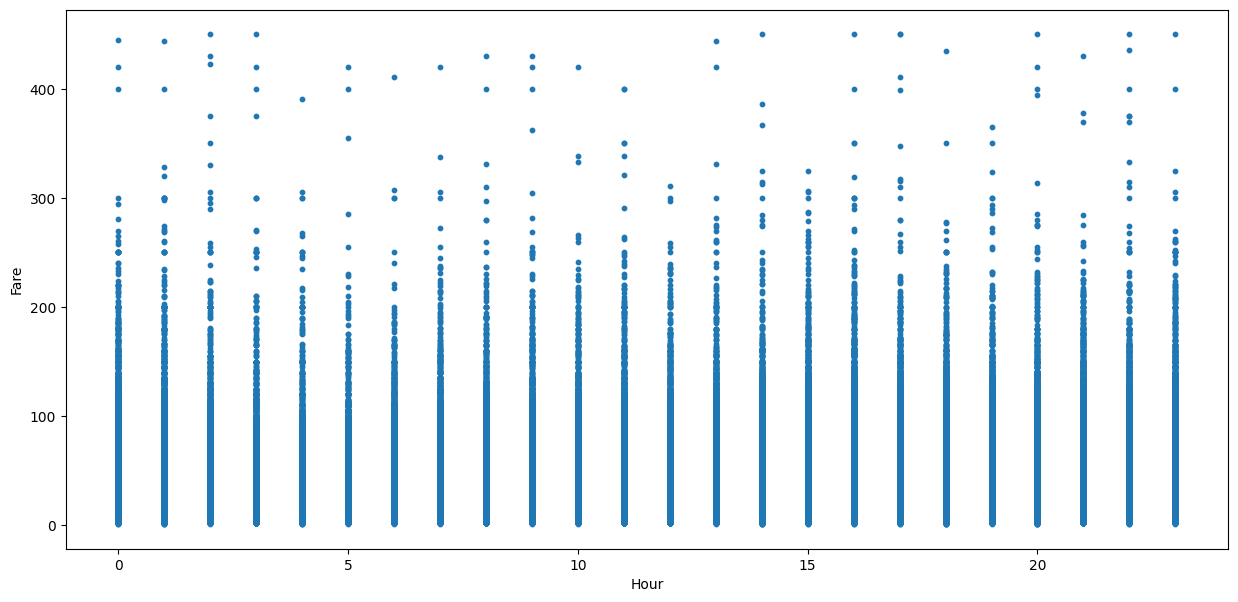

In [ ]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_pd['Hour'], y=train_pd['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest.
Hence we can assume that cabs taken early in morning and late at night are costliest


INFO:distributed.core:Event loop was unresponsive in Scheduler for 17.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 18.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 22.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 22.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 22.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

<Axes: xlabel='Day', ylabel='count'>

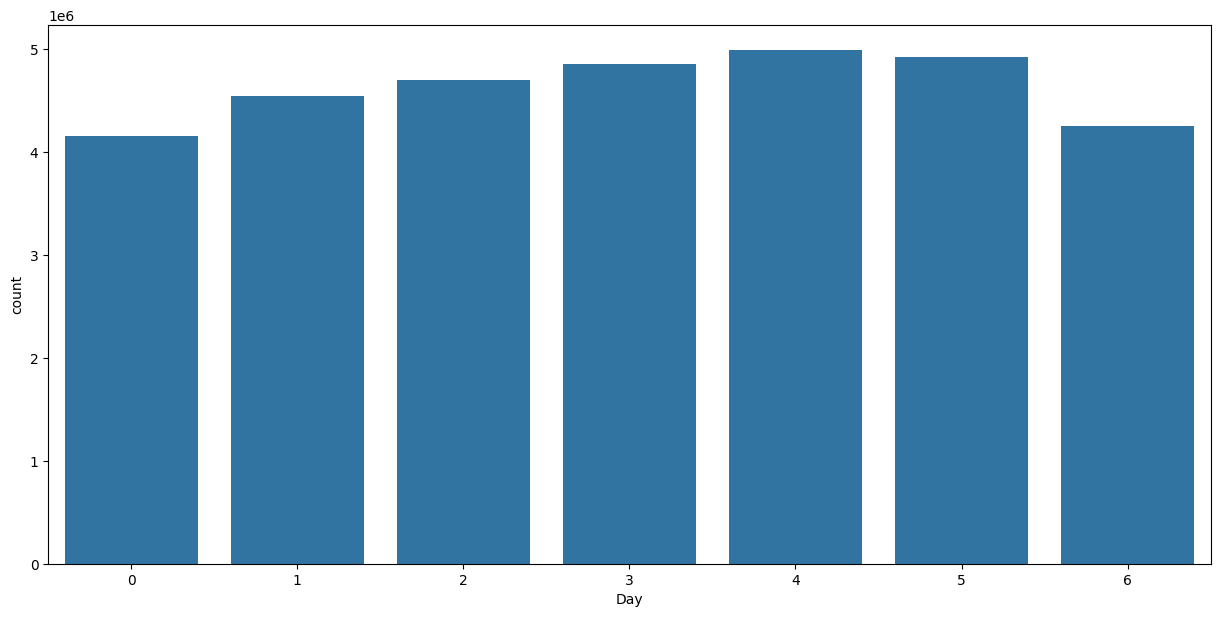

In [ ]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train_pd)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

INFO:distributed.core:Event loop was unresponsive in Nanny for 38.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 38.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 38.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 38.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 38.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

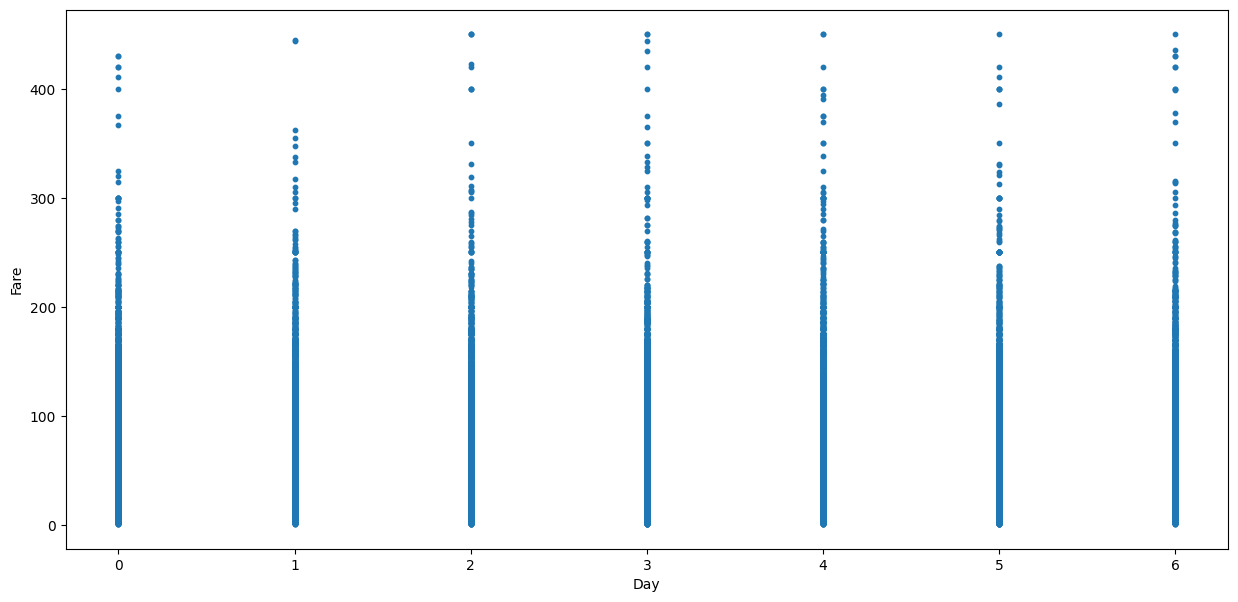

In [ ]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_pd['Day'], y=train_pd['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, and Thursday, and the low on Wednesday and Monday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

INFO:distributed.core:Event loop was unresponsive in Nanny for 62.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 62.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 62.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 62.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 62.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

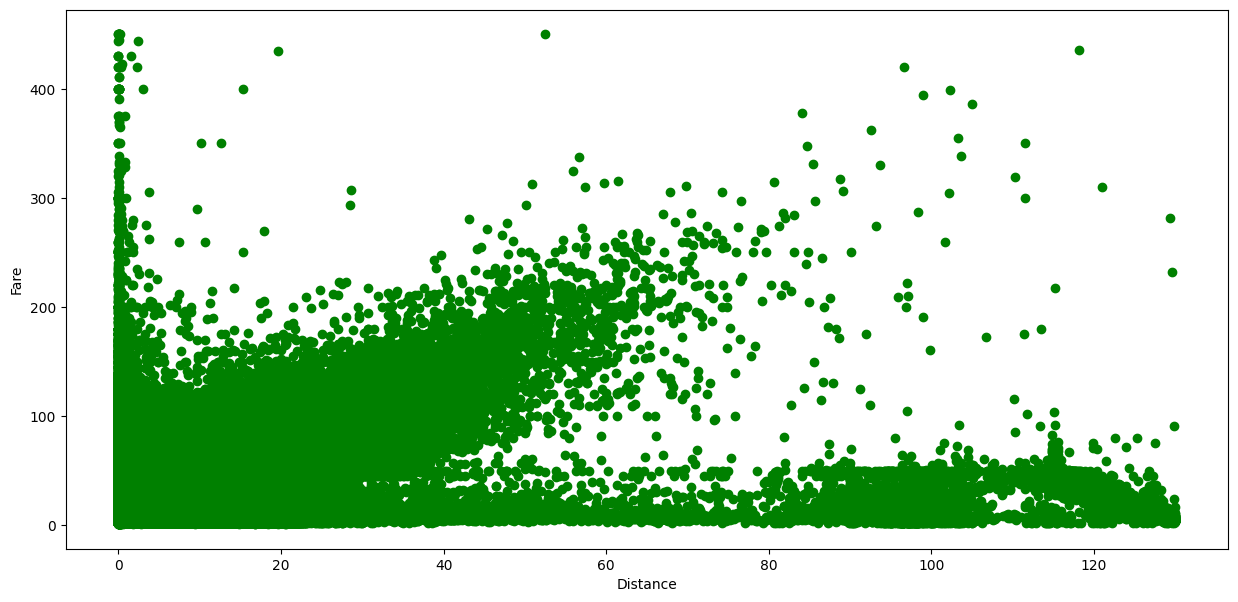

In [ ]:
#Relationship between distance and fare
plt.figure(figsize=(15,7))
plt.scatter(x = train_pd['distance'],y = train_pd['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

# Feature Scaling :

fare_amount


INFO:distributed.core:Event loop was unresponsive in Nanny for 3.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

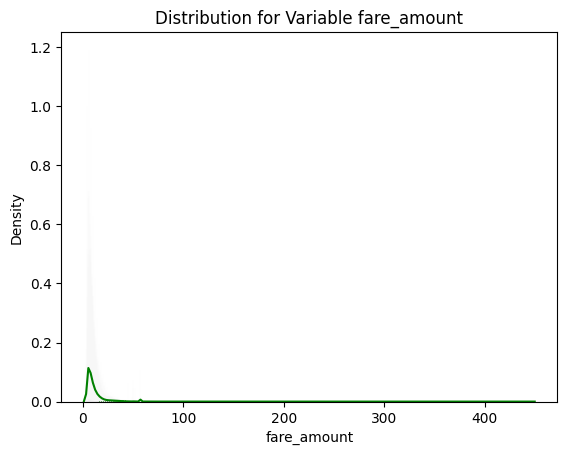

distance


INFO:distributed.core:Event loop was unresponsive in Nanny for 3.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

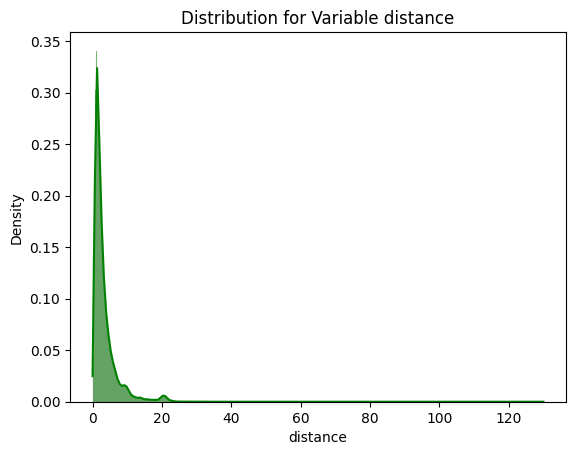

In [ ]:
#Normality check of training data is uniformly distributed or not-

# for i in ['fare_amount', 'distance']:
#     print(i)
#     sns.distplot(train_pd[i],bins='auto',color='green')
#     plt.title("Distribution for Variable "+i)
#     plt.ylabel("Density")
#     plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

# Normality check of training data is uniformly distributed or not
for i in ['fare_amount', 'distance']:
    print(i)
    sns.histplot(train_pd[i], kde=True, color='green', stat="density", bins='auto')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()






In [ ]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train_pd['fare_amount'] = np.log1p(train_pd['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train_pd['distance'] = np.log1p(train_pd['distance'])

fare_amount


INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

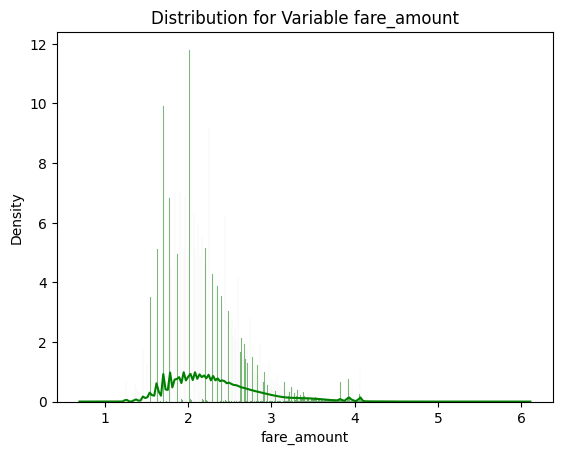

distance


INFO:distributed.core:Event loop was unresponsive in Nanny for 4.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

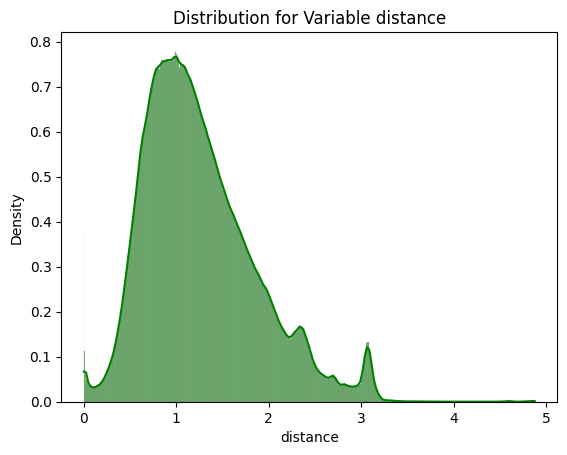

In [ ]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion
import seaborn as sns
import matplotlib.pyplot as plt

for i in ['fare_amount', 'distance']:
    print(i)
    sns.histplot(train_pd[i], bins='auto', color='green', kde=True, stat="density")
    plt.title("Distribution for Variable " + i)
    plt.ylabel("Density")
    plt.show()


Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our test data

# Applying ML ALgorithms:

In [ ]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train_pd.iloc[:, train_pd.columns != 'fare_amount'],
                         train_pd.iloc[:, 0], test_size = 0.20, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(25924370, 8)
(6481093, 8)


### Linear Regression Model :

In [ ]:
# Building model on top of training dataset
X_train = train_pd.drop(['key', 'fare_amount'], axis=1)  # Drop 'key' if it's not needed
y_train = train_pd['fare_amount'].astype(float)  # Ensure y_train is numeric


fit_LR = LinearRegression().fit(X_train , y_train)

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

In [ ]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [ ]:
print("Training columns:", X_train.columns)
print("Testing columns:", X_test.columns)

# Drop the 'key' column from X_test
X_test = X_test.drop('key', axis=1)

# Now you can make predictions with the trained model
pred_test_LR = fit_LR.predict(X_test)


Training columns: Index(['passenger_count', 'year', 'Month', 'Date', 'Day', 'Hour', 'distance'], dtype='object')
Testing columns: Index(['key', 'passenger_count', 'year', 'Month', 'Date', 'Day', 'Hour',
       'distance'],
      dtype='object')


In [ ]:
##calculating RMSE for test data


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the feature matrix X by dropping the 'key' and 'fare_amount' columns
X = train_pd.drop(['key', 'fare_amount'], axis=1)  # We're excluding 'key' because it's likely an identifier

# Prepare the target vector y
y = train_pd['fare_amount'].astype(float)  # Converting to float to ensure numerical calculations

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(X_train, y_train)

# Predict on training and testing data
pred_train_LR = model.predict(X_train)
pred_test_LR = model.predict(X_test)

# Calculate RMSE for training and testing datasets
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

# Print the RMSE values
print("RMSE on Training Data:", RMSE_train_LR)
print("RMSE on Testing Data:", RMSE_test_LR)

RMSE on Training Data: 0.2594203198052258
RMSE on Testing Data: 0.2594526849175961


In [ ]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7730250862695447

In [ ]:
r2_score(y_test, pred_test_LR)

0.7728972120885564

### Decision tree Model :

In [ ]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [ ]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [ ]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [ ]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29290957872503126
Root Mean Squared Error For Test data = 0.2928646227249712


In [ ]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.710640978360491

In [ ]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7106390287488293

### Random Forest Model :

In [ ]:
fit_RF = RandomForestRegressor(n_estimators=30,max_depth=10,n_jobs=-1,random_state=42).fit(X_train,y_train)

In [ ]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [ ]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [ ]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.2326903579909478
Root Mean Squared Error For Test data = 0.2326883237967606


In [ ]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.817389117843844

In [ ]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8173350134299443

### Gradient Boosting :

In [ ]:
fit_GB = GradientBoostingRegressor(n_estimators=20,max_depth=5,learning_rate=0.1,random_state=42).fit(X_train, y_train)

In [ ]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

INFO:distributed.core:Event loop was unresponsive in Nanny for 19.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 19.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 19.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 19.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 19.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause ti

In [ ]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [ ]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.24563428349415067
Root Mean Squared Error For Test data = 0.24549665976033866


In [ ]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.7966719470187819

In [ ]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.7965077646918651

# Optimizing the results with parameters tuning :

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
##Random Hyperparameter Grid


In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor with a random state for reproducibility
RRF = RandomForestRegressor(random_state=0)

# Define a smaller range for n_estimators and less variation in max_depth
n_estimator = list(range(10, 51, 10))  # Reduced maximum number of estimators
depth = list(range(3, 15, 3))  # Smaller range of depths for quicker evaluations

# Create the random grid
rand_grid = {
    'n_estimators': n_estimator,
    'max_depth': depth
}

# Initialize RandomizedSearchCV with fewer iterations and CV folds for speed
randomcv_rf = RandomizedSearchCV(
    RRF,
    param_distributions=rand_grid,
    n_iter=3,  # Reduced number of iterations
    cv=3,  # Fewer CV folds
    random_state=0,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
randomcv_rf.fit(X_train, y_train)

# Predict on the test set
predictions_RRF = randomcv_rf.predict(X_test)

# Retrieve the best parameters and the best model
view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_

# Evaluate the model
RRF_r2 = r2_score(y_test, predictions_RRF)
RRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ', view_best_params_RRF)
print('R-squared = {:.2f}.'.format(RRF_r2))
print('RMSE = {:.2f}'.format(RRF_rmse))


Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 50, 'max_depth': 12}
R-squared = 0.82.
RMSE = 0.23


In [ ]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [ ]:
best_model = randomcv_rf.best_estimator_

In [ ]:
test_path = 's3://taxi-data-raw/taxi_test_data.csv'

test_pd = pd.read_csv(test_path)

test_pd.head()






,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
test_pd['pickup_datetime'] = pd.to_datetime(test_pd['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

# Extract features like hour or other components if used in training
test_pd['hour'] = test_pd['pickup_datetime'].dt.hour
test_pd['day_of_week'] = test_pd['pickup_datetime'].dt.dayofweek



test_features = test_pd.drop(['key', 'pickup_datetime'], axis=1)

In [ ]:
from math import radians, cos, sin, asin, sqrt
import pandas as pd

# Haversine function definition that accepts four separate parameters
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km


# Calculate distance for each row in test_pd using the corrected haversine function
test_pd['distance'] = test_pd.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Extract additional features from pickup_datetime
test_pd['pickup_datetime'] = pd.to_datetime(test_pd['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
test_pd['year'] = test_pd['pickup_datetime'].dt.year
test_pd['Month'] = test_pd['pickup_datetime'].dt.month
test_pd['Date'] = test_pd['pickup_datetime'].dt.day
test_pd['Day'] = test_pd['pickup_datetime'].dt.dayofweek
test_pd['Hour'] = test_pd['pickup_datetime'].dt.hour

# Select the appropriate features that were used in the model
test_features = test_pd[['passenger_count', 'year', 'Month', 'Date', 'Day', 'Hour', 'distance']]

# Predict using the best model
predictions = best_model.predict(test_features)
test_pd['predicted_fare_amount'] = predictions

# Display the first few rows to verify predictions
print(test_pd[['key', 'predicted_fare_amount']].head())

                           key  predicted_fare_amount
0  2015-01-27 13:08:24.0000002               3.578364
1  2015-01-27 13:08:24.0000003               3.623484
2  2011-10-08 11:53:44.0000002               1.807255
3  2012-12-01 21:12:12.0000002               2.900125
4  2012-12-01 21:12:12.0000003               1.892530


In [ ]:
test_pd.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,distance,year,Month,Date,Day,Hour,predicted_fare_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1,2.323260,2015,1,27,1,13,3.578364
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1,2.425353,2015,1,27,1,13,3.623484
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,5,0.618628,2011,10,8,5,11,1.807255
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,5,1.961033,2012,12,1,5,21,2.900125
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,5,5.387301,2012,12,1,5,21,1.892530


In [ ]:
test_pd.to_csv('predicted_fare_amounts.csv', index=False)

In [ ]:
bucket_name = 'clean-taxi-data'

# Specify the object name in S3
object_name = 'predicted_fare_amounts.csv'


train_pd.to_csv('predicted_fare_amounts.csv', index=False)

In [ ]:
!pip install boto3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.34.88 which is incompatible.
s3fs 2024.3.1 requires fsspec==2024.3.1, but you have fsspec 2023.6.0 which is incompatible.


In [ ]:


import boto3

# Create an S3 client
s3_client = boto3.client(
    's3',
    aws_access_key_id=os.environ['AWS_ACCESS_KEY_ID'],
    aws_secret_access_key=os.environ['AWS_SECRET_ACCESS_KEY'],
    region_name=os.environ['AWS_REGION']
)

# Specify your bucket name
bucket_name = 'clean-taxi-data'

# Specify the object name in S3
object_name = 'predicted_fare_amounts.csv'

# Upload the file
s3_client.upload_file('predicted_fare_amounts.csv', bucket_name, object_name)